In [2]:
import pandas as pd
df = pd.read_json('MyData/StreamingHistory0.json')
df

,endTime,artistName,trackName,msPlayed
0,2021-04-30 18:52,Appointment Television,Episode 292: Dream Muppet-casting and Ted Lass...,1535310
1,2021-05-04 15:25,Quakers,War Drums,149800
2,2021-05-04 15:26,Charles Mingus,Oh Lord Don't Let Them Drop That Atomic Bomb o...,4540
3,2021-05-04 15:26,Neneh Cherry,What Reason Could I Give - Kim Hiorthøy Remix,50330
4,2021-05-04 15:26,Jungle,Busy Earnin',1640
...,...,...,...,...
3068,2022-05-04 18:52,Jungle,Romeo (feat. Bas),166200
3069,2022-05-04 18:55,Jungle,Lifting You,166586
3070,2022-05-04 18:56,Jungle,Bonnie Hill,68130
3071,2022-05-04 20:50,Jungle,Bonnie Hill,1369


In [3]:
sum(df['msPlayed'])/60000

19367.64015

In [5]:
df['artistName'].value_counts()

Jungle                    157
Upstate                   133
Appointment Television     90
Lucius                     86
Overdue                    85
                         ... 
Brooksie                    1
Megan Thee Stallion         1
Keys N Krates               1
Car Seat Headrest           1
Local Natives               1
Name: artistName, Length: 652, dtype: int64

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#how many times have I listend to each song?

song_df = df['trackName'].value_counts()
song_df.index

Index(['I'll Be Fine', 'Keep Moving', 'Weekend', 'Truth', 'Dynamite',
       'Got Body', 'The Hardest Cut', 'brutal', 'Talk About It', 'Sexy MF',
       ...
       'Back to the Future (Part II)', 'Till It's Done (Tutu)', 'Poparazzi',
       'Don't Just Sit There - Recorded Live at Sounds Like a Fire', 'Drops',
       'Another Life', 'Son Of A Gun', 'Watermelon Man - Remastered',
       'I Love Music', 'Dark Days [Feat. Sylvan Esso]'],
      dtype='object', length=1560)

In [33]:
song_df.values

array([35, 34, 25, ...,  1,  1,  1], dtype=int64)

In [39]:
top_songs_df = song_df.loc[song_df.values > 10]

<AxesSubplot:>

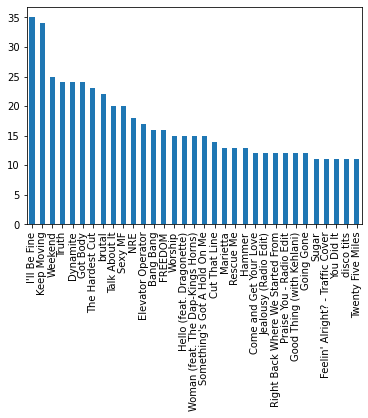

In [40]:
top_songs_df.plot(kind='bar')

In [ ]:
#filter out songs on running playlist
#are all top songs on liked songs playlist
#what genre are top songs? (connect to spotify API to add genre to df)

In [43]:
#divide play time: podcasts vs songs

#ms to minutes
df['minutesPlayed'] = df['msPlayed']/60000
df.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2021-04-30 18:52,Appointment Television,Episode 292: Dream Muppet-casting and Ted Lass...,1535310,25.588500
1,2021-05-04 15:25,Quakers,War Drums,149800,2.496667
2,2021-05-04 15:26,Charles Mingus,Oh Lord Don't Let Them Drop That Atomic Bomb o...,4540,0.075667
3,2021-05-04 15:26,Neneh Cherry,What Reason Could I Give - Kim Hiorthøy Remix,50330,0.838833
4,2021-05-04 15:26,Jungle,Busy Earnin',1640,0.027333


In [50]:
#remove rows where playtime is less than 30 seconds
df_clean = df.loc[df['msPlayed'] > 30000,:]
df_clean

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2021-04-30 18:52,Appointment Television,Episode 292: Dream Muppet-casting and Ted Lass...,1535310,25.588500
1,2021-05-04 15:25,Quakers,War Drums,149800,2.496667
3,2021-05-04 15:26,Neneh Cherry,What Reason Could I Give - Kim Hiorthøy Remix,50330,0.838833
5,2021-05-04 15:29,LION BABE,Wonder Woman,199040,3.317333
7,2021-05-04 16:37,Ben Folds Five,Underground,251293,4.188217
...,...,...,...,...,...
3067,2022-05-04 18:49,Jungle,All Of The Time,182040,3.034000
3068,2022-05-04 18:52,Jungle,Romeo (feat. Bas),166200,2.770000
3069,2022-05-04 18:55,Jungle,Lifting You,166586,2.776433
3070,2022-05-04 18:56,Jungle,Bonnie Hill,68130,1.135500


In [51]:
df_clean.sort_values('minutesPlayed',ascending = False)

,endTime,artistName,trackName,msPlayed,minutesPlayed
877,2021-08-02 19:35,Overdue,"Ep 486 - Moonglow, by Kristen Callihan (w/ Hea...",6055061,100.917683
1307,2021-09-28 17:29,Overdue,"Ep 495 - Eragon, by Christopher Paolini (w/ Na...",5381973,89.699550
2745,2022-03-30 14:58,Overdue,"Ep 524 - The Love Hypothesis, by Ali Hazelwood...",5157475,85.957917
1594,2021-11-18 15:20,Maintenance Phase,Is Being Fat Bad For You?,5082201,84.703350
1892,2022-01-03 17:50,You're Wrong About,Winter Book Club: The Amityville Horror w. Jam...,5015353,83.589217
...,...,...,...,...,...
2924,2022-04-20 18:22,Fatboy Slim,Praise You - Radio Edit,30860,0.514333
576,2021-07-13 21:30,The Charlie Daniels Band,Long Haired Country Boy,30840,0.514000
550,2021-07-09 19:11,Ramsey Lewis,Sexy Sadie,30586,0.509767
2733,2022-03-25 14:01,Upstate,I'll Be Fine,30429,0.507150


In [53]:
overdue = df_clean.loc[df['artistName'] == 'Overdue']
overdue.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed
99,2021-05-18 23:06,Overdue,"Ep 474 - Gaudy Night, by Dorothy L. Sayers",1144952,19.082533
288,2021-06-02 18:11,Overdue,Ep 475 - Nancy Drew #1 - The Secret of the Old...,3652638,60.877300
327,2021-06-10 14:11,Overdue,"Ep 469 - Coraline, by Neil Gaiman",3479039,57.983983
427,2021-06-20 15:50,Overdue,"Ep 478 - The Water Dancer, by Ta-Nehisi Coates",2120558,35.342633
428,2021-06-20 17:53,Overdue,"Ep 478 - The Water Dancer, by Ta-Nehisi Coates",1450069,24.167817


In [58]:
overdue_minutes = overdue['minutesPlayed'].sum()
print(f'Total time listening to Overdue: {round(overdue_minutes/60,1)} hours')

Total time listening to Overdue: 39.2 hours
